One of the advantages of Keras is that it can import this dataset for you without needing to explicitly download it from the web (it will download it for you). We'll normalize the images and we'll convert the target data to one-hot encoding: 

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255

classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

11490434/11490434 [==============================] - 1s 0us/step


Next, we'll define the network:

In [2]:
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation
from keras.models import Sequential

input_size = 784
hidden_units = 100

model = Sequential([
    Dense(hidden_units, input_dim=input_size),
    BatchNormalization(),
    Activation('relu'),
    Dense(classes),
    Activation('softmax')
])

Then, we'll run the training for 20 epochs:

In [3]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

model.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          verbose=1)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3025 - accuracy: 0.9176
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1393 - accuracy: 0.9614
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0997 - accuracy: 0.9725
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9785
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0613 - accuracy: 0.9823
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0520 - accuracy: 0.9847
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0431 - accuracy: 0.9881
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0366 - accuracy: 0.9897
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9918
Epoch 10/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0262 - accuracy: 0.9933

Finally, we'll evaluate the network:

In [4]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9748
Test accuracy: 0.9747999906539917


We'll visualize the weights of the hidden layer:

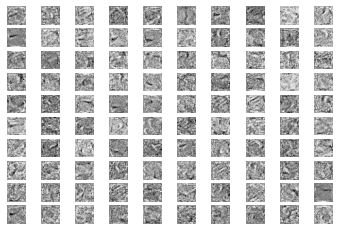

In [5]:
weights = model.layers[0].get_weights()

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()

w = weights[0].T
for unit in range(hidden_units):
    ax = fig.add_subplot(10, 10, unit + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[unit], (28, 28)), cmap=cm.Greys_r)

plt.show()